In [1]:
#Importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import regex as re
import math
from tabulate import tabulate
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
data = pd.read_csv("dataset.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
disease_des = pd.read_csv("symptom_Description.csv")
disease_des.info()
disease_des.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [4]:
symptom_wt = pd.read_csv("Symptom-severity.csv")
symptom_wt.info()
symptom_wt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [5]:
symptom_pre = pd.read_csv("symptom_precaution.csv")
symptom_pre.info()
symptom_pre.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [6]:
df_info = pd.merge(disease_des, symptom_pre, on='Disease', how='outer')
df_info

,Disease,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,An infectious disease caused by protozoan para...,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,An allergy is an immune system response to a f...,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi...",reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,Psoriasis is a common skin disorder that forms...,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,GERD,"Gastroesophageal reflux disease, or GERD, is a...",avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,Chronic cholestasis,"Chronic cholestatic diseases, whether occurrin...",cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis A,Hepatitis A is a highly contagious liver infec...,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,Osteoarthristis,Osteoarthritis is the most common form of arth...,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) Paroymsal Positional Vertigo,Benign paroxysmal positional vertigo (BPPV) is...,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [7]:
df_info.shape

(41, 6)

In [8]:
# total number of different distinct symptoms present
print(symptom_wt['Symptom'].unique())
print("length:",len(symptom_wt['Symptom'].unique()))

['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'
 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'
 'pain_in_anal_region' 'bloody_s

In [9]:
# total number of different distinct disease present
print(data['Disease'].unique())
print("length:",len(data['Disease'].unique()))

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
length: 41


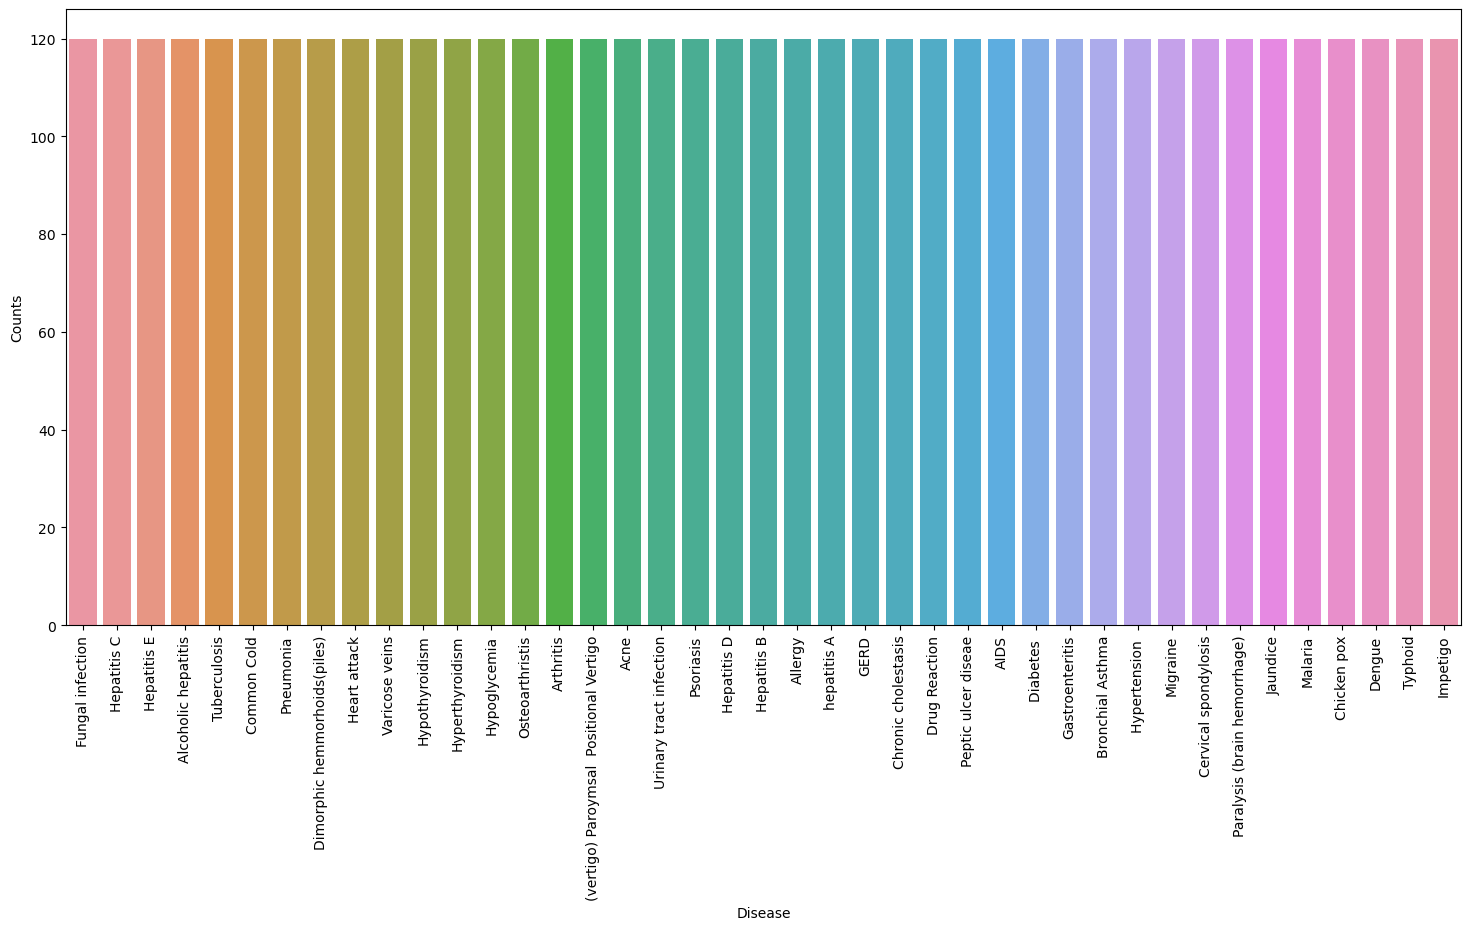

In [10]:
# Checking whether the dataset is balanced or not
disease_counts = data["Disease"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [11]:
# labeling the symptoms for each disease 
cols = [i for i in data.iloc[:,1:].columns]
tmp = pd.melt(data.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [12]:
# converting the form or structure of the dataset
disease = pd.pivot_table(tmp, values = 'add1', index = 'index', columns = 'value')
disease.insert(0,'Disease',data['Disease'])
disease= disease.fillna(0)
disease.head()

value,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
disease.shape

(4920, 132)

In [14]:
# spliting the predictor variable and the explanatory variables from train dataset 
X = disease.drop(columns='Disease')
y = disease['Disease']
X.shape, y.shape

((4920, 131), (4920,))

In [15]:
# We split the data into training and validation(testing) set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3936, 131), (3936,), (984, 131), (984,))

In [21]:
X_train

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
1807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
184,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3092,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
y_train

index
1807            Chicken pox
184                 Typhoid
205             Hepatitis B
4581         Varicose veins
410        Fungal infection
               ...         
4426              Psoriasis
466     Peptic ulcer diseae
3092                 Dengue
3772       Fungal infection
860           Drug Reaction
Name: Disease, Length: 3936, dtype: object

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

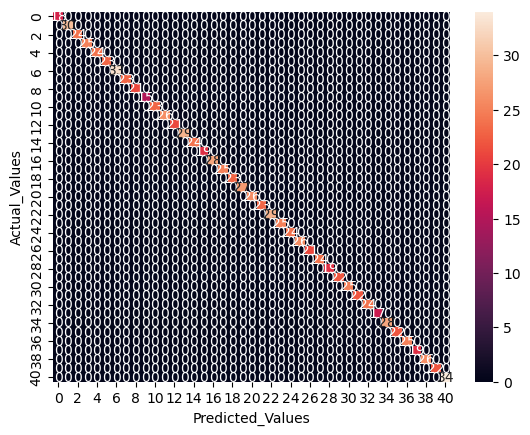

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)

print(classification_report(y_test,predictions_rfc))
ax = sns.heatmap(confusion_matrix(y_test,predictions_rfc),annot=True)
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

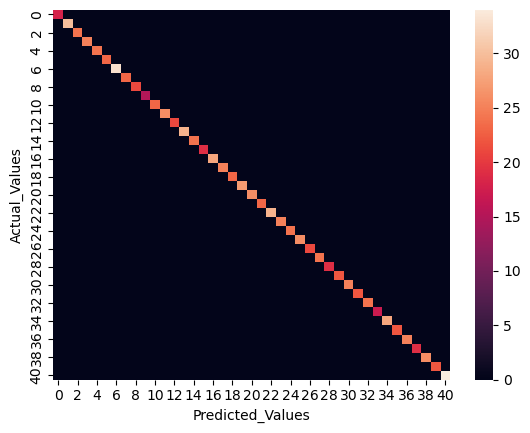

In [44]:
# Naive Bayes(NB) 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions_gnb = gnb.predict(X_test)

print(classification_report(y_test,predictions_gnb))
ax = sns.heatmap(confusion_matrix(y_test,predictions_gnb))
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

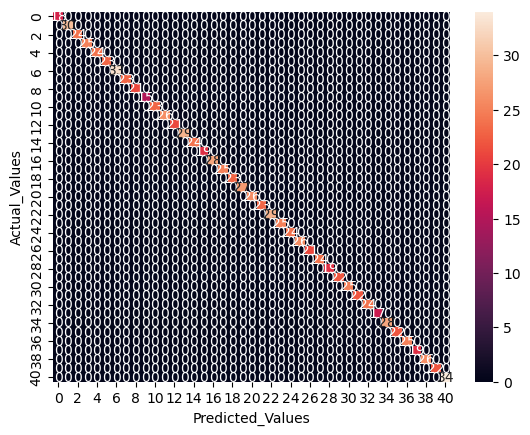

In [46]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)
predictions_svm = svm.predict(X_test)

print(classification_report(y_test,predictions_svm))
ax = sns.heatmap(confusion_matrix(y_test,predictions_svm),annot=True)
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

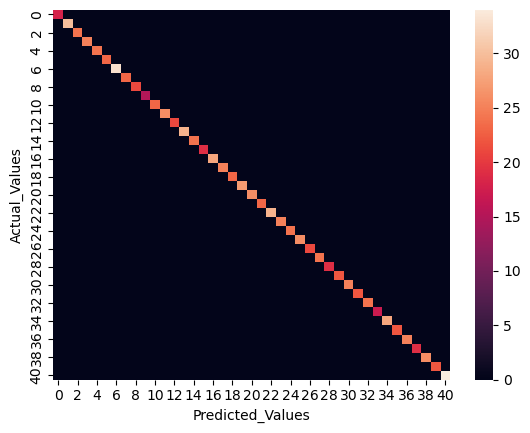

In [47]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
predictions_gb = gb.predict(X_test)

print(classification_report(y_test,predictions_gb))
ax = sns.heatmap(confusion_matrix(y_test,predictions_gb))
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

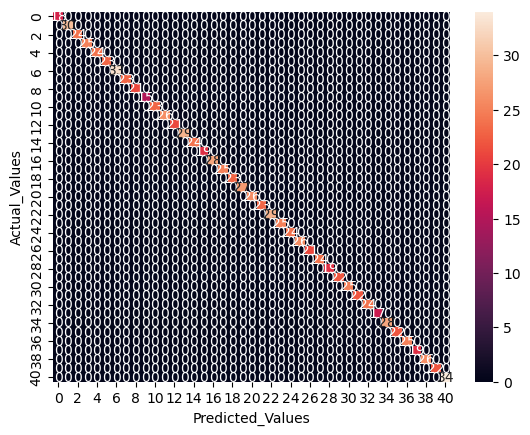

In [58]:
# Voting Ensemble Method (Combining all tree based algorithm)
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

models=[]
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble=VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
predictions_vem = ensemble.predict(X_test)

print(classification_report(y_test,predictions_vem))
ax = sns.heatmap(confusion_matrix(y_test,predictions_vem),annot=True)
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

In [59]:
# test data containing predicted disease along with its descriptions and precautions 
df = pd.concat([X_test,y_test],axis=1,ignore_index=False)
df['Predicted_Disease'] = predictions_rfc
df_pred = pd.merge(df, df_info, on='Disease', how='inner')
df_pred

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,yellowing_of_eyes,yellowish_skin,itching,Disease,Predicted_Disease,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Acne,Acne,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Acne,Acne,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Acne,Acne,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Acne,Acne,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Acne,Acne,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Osteoarthristis,Osteoarthristis,Osteoarthritis is the most common form of arth...,acetaminophen,consult nearest hospital,follow up,salt baths
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Osteoarthristis,Osteoarthristis,Osteoarthritis is the most common form of arth...,acetaminophen,consult nearest hospital,follow up,salt baths
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Osteoarthristis,Osteoarthristis,Osteoarthritis is the most common form of arth...,acetaminophen,consult nearest hospital,follow up,salt baths
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Osteoarthristis,Osteoarthristis,Osteoarthritis is the most common form of arth...,acetaminophen,consult nearest hospital,follow up,salt baths
